In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
from sklearn.metrics import accuracy_score,mean_squared_error
import statsmodels.api as sm
rcParams['figure.figsize'] = 10, 4
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel('incidents_new.xlsx')

In [3]:
# To fetch aggregated monthly data for year and month
def monthlyData(df, year, month):
    return np.sum(df.filter(items = df.columns[df.columns.map(lambda x: str(x.month)+str(x.year)) == str(month)+str(year)]).values)

In [4]:
# Aggregated daily data
df = pd.DataFrame(dataset.groupby('Creation date').agg('count')['Incident ID']).transpose()
df

Creation date,2009-01-06 04:00:00,2009-01-09 04:00:00,2009-01-14 04:00:00,2009-01-15 04:00:00,2009-01-19 04:00:00,2009-01-20 04:00:00,2009-01-21 04:00:00,2009-01-23 04:00:00,2009-01-29 04:00:00,2009-01-30 04:00:00,...,2019-05-02 23:40:03,2019-05-02 23:49:43,2019-05-03 22:04:08,2019-05-03 22:17:08,2019-05-05 23:41:42,2019-05-06 13:49:14,2019-05-06 15:09:47,2019-05-06 17:46:03,2019-05-06 22:33:32,2019-05-07 14:50:54
Incident ID,2,3,1,1,1,2,2,1,1,1,...,1,1,1,1,1,1,1,1,1,1


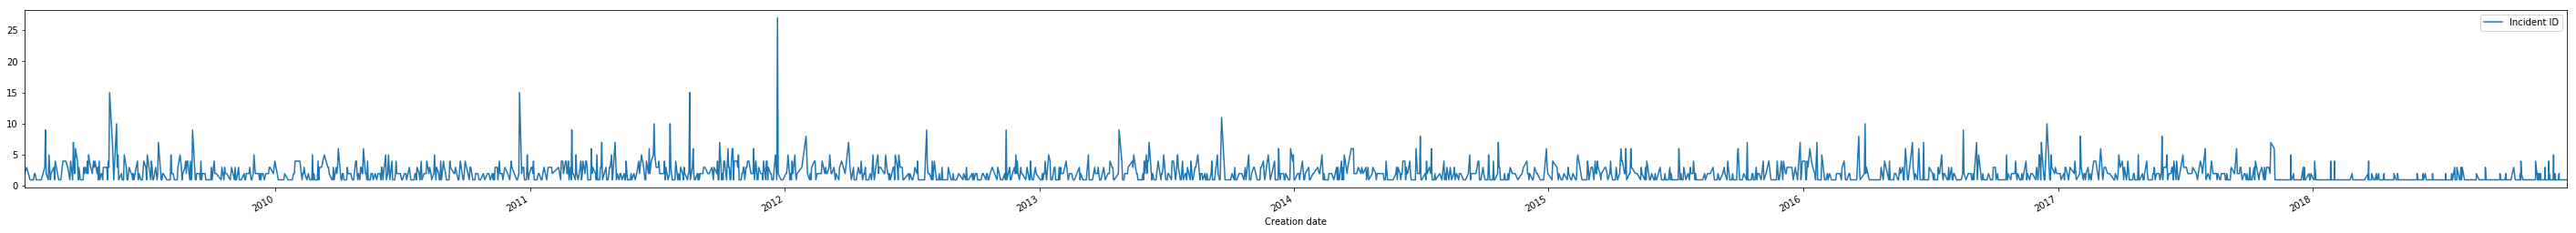

In [5]:
# yearly daily plot
year_regression = dataset[dataset['Creation date'].map(lambda x:x.year)!=2019]
year_regression = pd.DataFrame(year_regression.groupby('Creation date')['Incident ID'].agg('count'))
year_regression.plot(figsize=(50,4))

In [5]:
# month wise plot for all years in range
monthly_data = []
month_year = []
years = range(2012, 2019)
months = range(1,13)
for year in years:
    for month in months:
        monthly_data.append(monthlyData(df, year, month))
        month_year.append(str(month)+"-"+str(year))
# monthly Data frame
month_df = pd.DataFrame(monthly_data, columns=["inc_count"], index = pd.to_datetime(month_year))
month_df.head()

,inc_count
2012-01-01,35
2012-02-01,48
2012-03-01,34
2012-04-01,40
2012-05-01,44


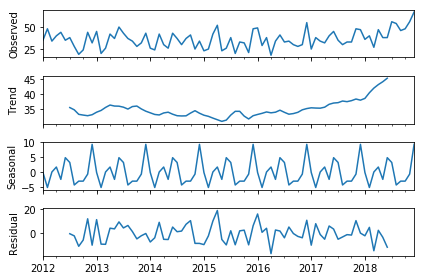

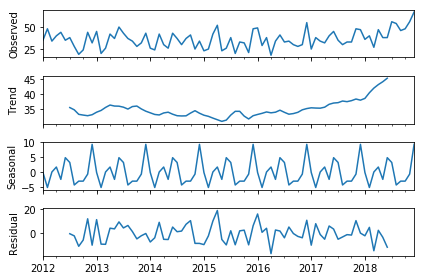

In [6]:
from pylab import rcParams
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(month_df, model='additive')
decomposition.plot()

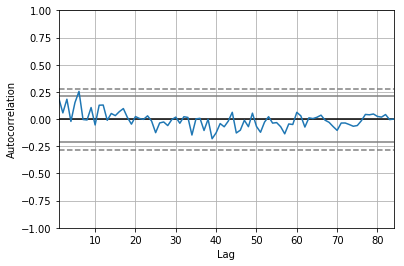

In [7]:
# Check for p-value
# p-value = 0
autocorrelation_plot(month_df)

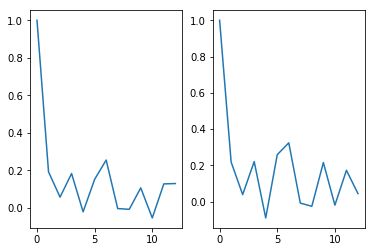

In [8]:
# getting p value 
from statsmodels.tsa.stattools import acf, pacf
lagacf = acf(month_df, nlags = 12)
lagpacf = pacf(month_df, nlags=12, method='ols')
plt.subplot(121)
plt.plot(lagacf)
plt.subplot(122)
plt.plot(lagpacf)
plt.show()
# trials
# p - 7 q - 2
# 

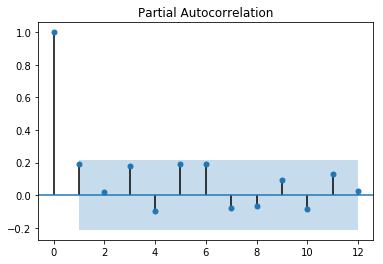

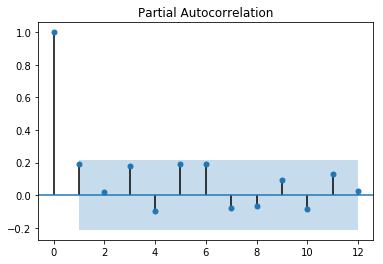

In [9]:
# for getting the q - value
plot_pacf(month_df, lags=12)
# q-value = 2

In [10]:
# ARIMA Model Try 1
# Try 1 - p = 0
model = sm.tsa.statespace.SARIMAX(month_df, order=(7,2,9), enforce_stationarity=False, enforce_invertibility=False)
model_arima = model.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:              inc_count   No. Observations:                   84
Model:               SARIMAX(7, 2, 9)   Log Likelihood                -252.842
Date:                Fri, 14 Jun 2019   AIC                            539.684
Time:                        08:54:48   BIC                            578.387
Sample:                    01-01-2012   HQIC                           555.092
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2415      0.301     -4.127      0.000      -1.831      -0.652
ar.L2         -1.5071      0.328     -4.590      0.000      -2.151      -0.864
ar.L3         -1.0433      0.487     -2.142      0.032      -1.998      -0.089
ar.L4         -1.2349      0.340     -3.635      0.000      -1.901      -0.569
ar.L5         -1.1356      0.421     -2.694      0.007      -1.962      -0.310
ar.L6         -0.8698      0.258     -3.368      0.001      -1.376      -0.364
ar.L7         -0.4109      0.266     -1.546      0.122      -0.932       0.110
ma.L1         -0.5841      9.526     -0.061      0.951     -19.255      18.087
ma.L2          0.0295      6.151      0.005      0.996     -12.027      12.086
ma.L3         -0.6921     10.162     -0.068      0.946     -20.610      19.226
ma.L4          0.5019     12.353      0.041      0.968     -23.709      24.713
ma.L5         -0.1259     11.723     -0.011      0.991     -23.102      22.850
ma.L6         -0.1633     11.475     -0.014      0.989     -22.654      22.327
ma.L7         -0.4519      6.789     -0.067      0.947     -13.757      12.853
ma.L8         -0.1489      9.041     -0.016      0.987     -17.869      17.571
ma.L9          0.8245     12.071      0.068      0.946     -22.834      24.483
sigma2        50.7367    738.262      0.069      0.945   -1396.231    1497.704
===================================================================================
Ljung-Box (Q):                       22.13   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.99   Prob(JB):                         0.73
Heteroskedasticity (H):               1.19   Skew:                             0.23
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

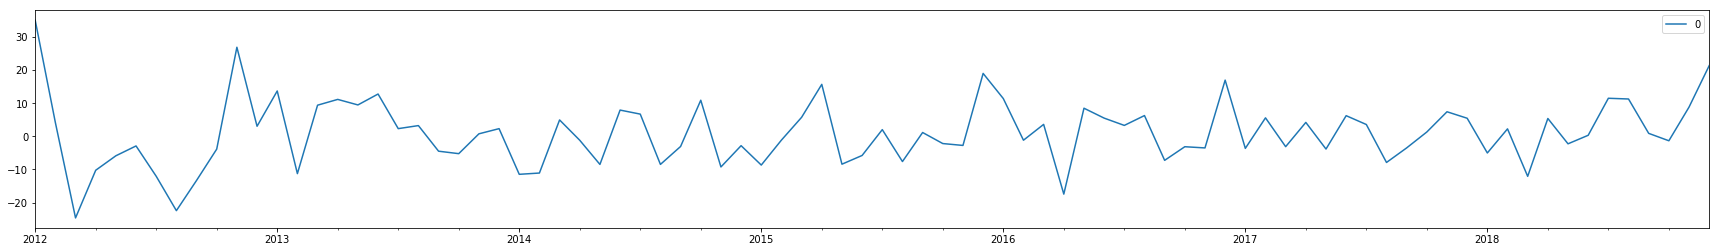

In [11]:
pd.DataFrame(model_arima.resid).plot(figsize=(30,4))

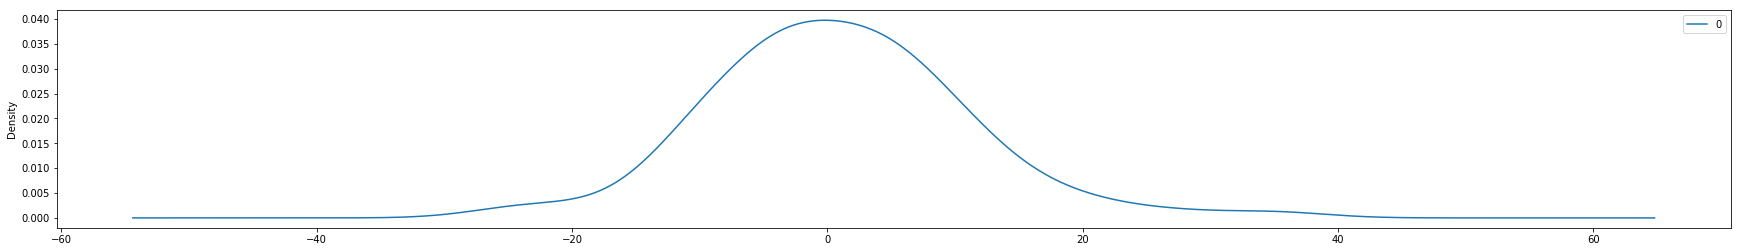

In [12]:
pd.DataFrame(model_arima.resid).plot(figsize=(30,4), kind='kde')

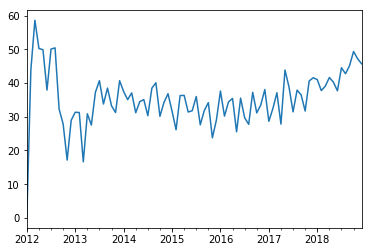

In [14]:
model_arima.get_prediction(start=pd.to_datetime('2012-01-01')).predicted_mean.plot()

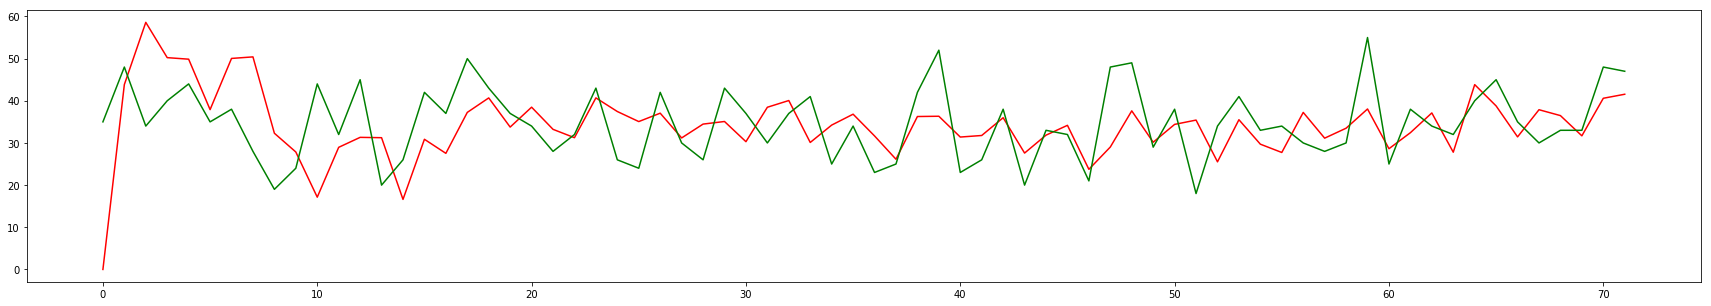

In [42]:
# compare curve fitting
plt.figure(figsize=(30,5))
plt.plot(model_arima.get_prediction(start=pd.to_datetime('2012-01-01')).predicted_mean.values[:72], color='red')
plt.plot(monthly_data[:72], color='green')


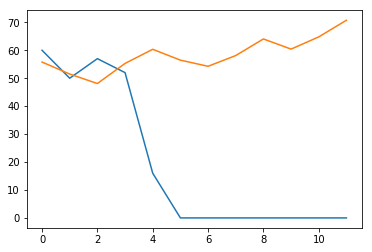

In [23]:
#testing ARIMA forecasts
test_monthly_data = []
index_pred = []
for month in range(1,13):
    test_monthly_data.append(monthlyData(df, str(2019), month))
    index_pred.append(str(month)+"-"+str(2019))
plt.plot(test_monthly_data)
plt.plot(model_arima.forecast(steps=12).values)

In [70]:
model_arima.forecast(steps=5).values.astype(int).tolist()

[55, 51, 48, 55, 60]

In [78]:
import math
expected = test_monthly_data[0:3]
predictions = model_arima.forecast(steps=3).astype(int).values.tolist()
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
print('Forecast Errors: %s' % np.mean(forecast_errors))
rms = math.sqrt(mean_squared_error(expected, predictions))
print("RMS " , rms)

Forecast Errors: 4.333333333333333
('RMS ', 5.972157622389639)


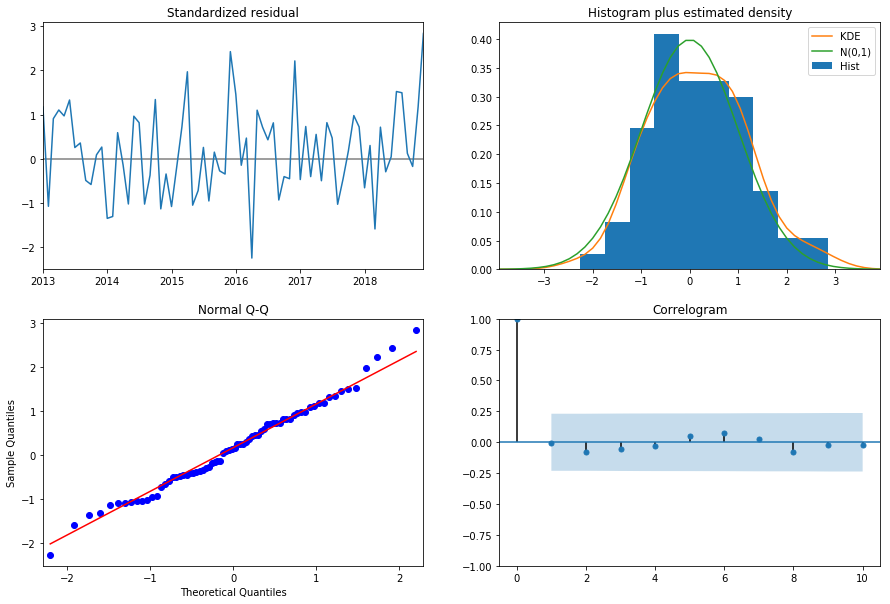

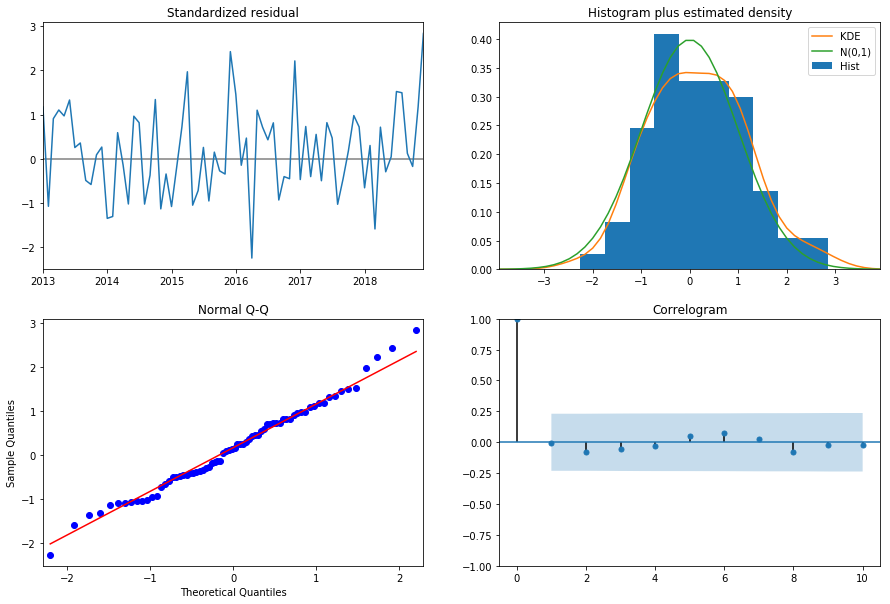

In [17]:
model_arima.plot_diagnostics(figsize=(15,10))

In [83]:
import pickle
pickle.dump(model_arima, open('pickles/sarima-incident', "wb"))

In [43]:
def dateFormatter(t):
    t = t.split('-')
    t = t[1] + "-"+ (t[0] if len(t[0]) > 1 else "0"+ t[0])
    return t

In [39]:
import json
previous_data = []
predicted_values = model_arima.get_prediction(start=pd.to_datetime('2012-01-01')).predicted_mean.values
format_date = []
for t in month_year:
    t = t.split('-')
    t = t[1] + "-"+ (t[0] if len(t[0]) > 1 else "0"+ t[0])
    format_date.append(t)
for i in range(len(month_year)):
    previous_data.append({
        "date": format_date[i],
        "data": monthly_data[i],
        "pred": predicted_values[i]
    })
json.dumps(previous_data)

'[{"date": "2012-01", "pred": 0.0, "data": 35}, {"date": "2012-02", "pred": 43.84962025188385, "data": 48}, {"date": "2012-03", "pred": 58.5995684628413, "data": 34}, {"date": "2012-04", "pred": 50.23094914260347, "data": 40}, {"date": "2012-05", "pred": 49.86553008471769, "data": 44}, {"date": "2012-06", "pred": 37.90102280217983, "data": 35}, {"date": "2012-07", "pred": 50.04258466018626, "data": 38}, {"date": "2012-08", "pred": 50.40961700826938, "data": 28}, {"date": "2012-09", "pred": 32.29857257208564, "data": 19}, {"date": "2012-10", "pred": 27.85424505829527, "data": 24}, {"date": "2012-11", "pred": 17.143353498085848, "data": 44}, {"date": "2012-12", "pred": 28.961112362757838, "data": 32}, {"date": "2013-01", "pred": 31.326328149620267, "data": 45}, {"date": "2013-02", "pred": 31.2459765409628, "data": 20}, {"date": "2013-03", "pred": 16.612204750971117, "data": 26}, {"date": "2013-04", "pred": 30.867728911012705, "data": 42}, {"date": "2013-05", "pred": 27.53482887760537, "d

In [37]:
t = '1-2012'.split('-')
# len(t[0]) > 1 if  else ("0"+ t[0])
t = t[1] + "-"+ (t[0] if len(t[0]) > 1 else "0"+ t[0])
t

'2012-01'

In [46]:
predicted_data = []
pred_values = model_arima.forecast(steps=12).values
for i in range(len(month_year[72:])):
    predicted_data.append({
        "date": dateFormatter(month_year[72:][i]),
        "data": monthly_data[72:][i],
        "pred": predicted_values[72:][i]
    })
for i in range(len(index_pred)):
    predicted_data.append({
        "date": dateFormatter(index_pred[i]),
        "data": test_monthly_data[i],
        "pred": pred_values[i]
    })
json.dumps(predicted_data)

'[{"date": "2018-01", "pred": 41.01558335650653, "data": 36}, {"date": "2018-02", "pred": 37.75114680168164, "data": 40}, {"date": "2018-03", "pred": 39.061917770642715, "data": 27}, {"date": "2018-04", "pred": 41.61680878910347, "data": 47}, {"date": "2018-05", "pred": 40.25596752203782, "data": 38}, {"date": "2018-06", "pred": 37.685310977088115, "data": 38}, {"date": "2018-07", "pred": 44.525685518960806, "data": 56}, {"date": "2018-08", "pred": 42.74327776242526, "data": 54}, {"date": "2018-09", "pred": 45.10627704701966, "data": 46}, {"date": "2018-10", "pred": 49.3381890196175, "data": 48}, {"date": "2018-11", "pred": 47.18724580652315, "data": 56}, {"date": "2018-12", "pred": 45.687111666401364, "data": 67}, {"date": "2019-01", "pred": 55.782404469059095, "data": 60}, {"date": "2019-02", "pred": 51.49190255868231, "data": 50}, {"date": "2019-03", "pred": 48.09819967873567, "data": 57}, {"date": "2019-04", "pred": 55.29565060293277, "data": 52}, {"date": "2019-05", "pred": 60.351

In [45]:
month_year[72:]

['1-2018',
 '2-2018',
 '3-2018',
 '4-2018',
 '5-2018',
 '6-2018',
 '7-2018',
 '8-2018',
 '9-2018',
 '10-2018',
 '11-2018',
 '12-2018']